In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_SPARK/Data/train_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_SPARK/Data/test_data.csv')

In [5]:
type_list = [[] for _ in range(8)]
type_idx_list = [[] for _ in range(8)]

for i,row in df_data.iterrows():
  type_list[int(row['type'])].append(row)
  type_idx_list[int(row['type'])].append(i)

df_list = []


for ls in type_list:
  df = pd.DataFrame(ls).drop(axis=1,columns=['type'])
  df_list.append(df)
  #df_val_list.append(pd.DataFrame(ls[-30:]).drop(axis=1,columns=['type']))
  print(df.shape)


(432, 7)
(369, 7)
(366, 7)
(306, 7)
(306, 7)
(249, 7)
(249, 7)
(186, 7)


In [21]:
df_list[0]

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12
...,...,...,...,...,...,...,...
427,1.32,37.49,0.7,17.10,1399.0,55.54,2.78
428,1.80,43.85,0.7,23.32,1908.0,61.20,3.06
429,2.79,56.99,0.7,36.17,2959.0,72.88,3.64
430,2.25,49.79,0.7,29.13,2383.0,66.48,3.32


In [6]:
type_list = [[] for _ in range(8)]
type_idx_list = [[] for _ in range(8)]

for i,row in df_test.iterrows():
  type_list[int(row['type'])].append(row)
  type_idx_list[int(row['type'])].append(i)


df_test_list = []

for ls in type_list:
  df = pd.DataFrame(ls).drop(axis=1,columns=['type'])
  df_test_list.append(df)
  #df_val_list.append(pd.DataFrame(ls[-30:]).drop(axis=1,columns=['type']))
  print(df.shape)


(1296, 7)
(1107, 7)
(1098, 7)
(918, 7)
(918, 7)
(747, 7)
(747, 7)
(558, 7)


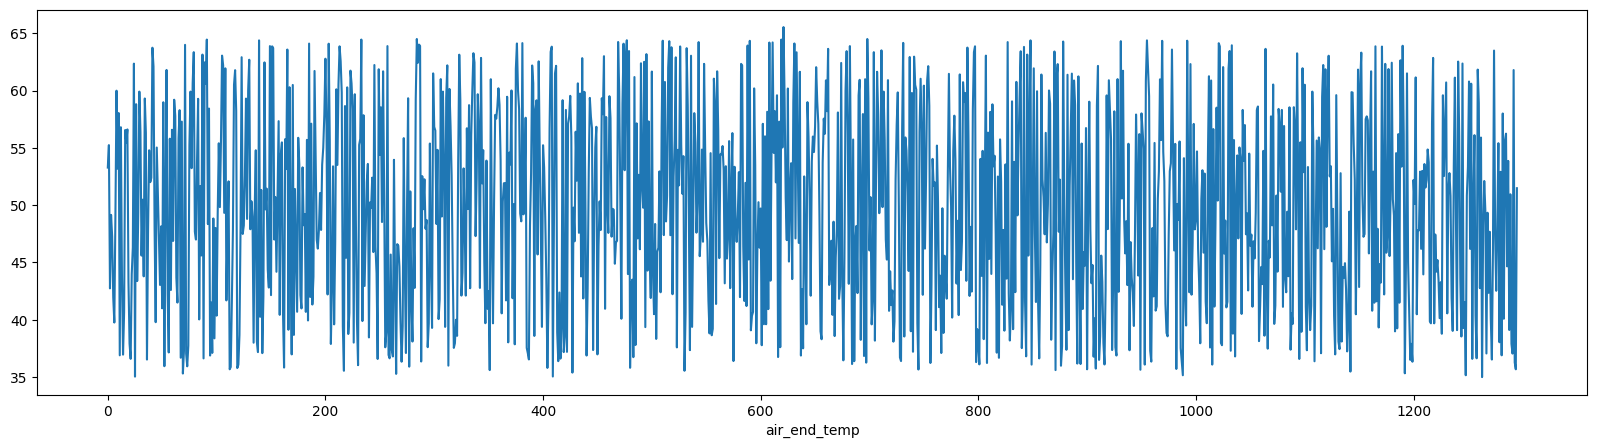

In [20]:
for i,col in enumerate(list(df_test_list[0])):
  
  if i != 1 : continue
  plt.figure(figsize=(20,5))
  plt.plot(df_test_list[0][col])
  #plt.hist(df_test_list[0][col],bins=100)
  plt.xlabel(col)
  plt.show()
  

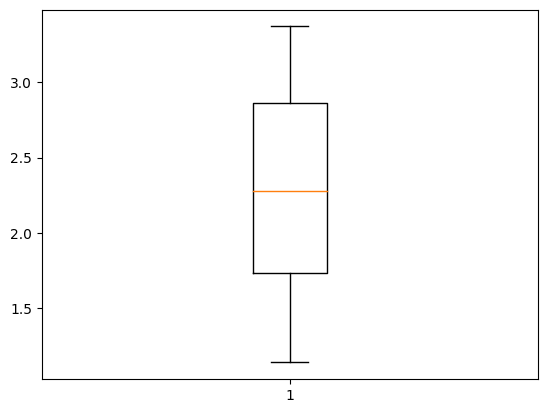

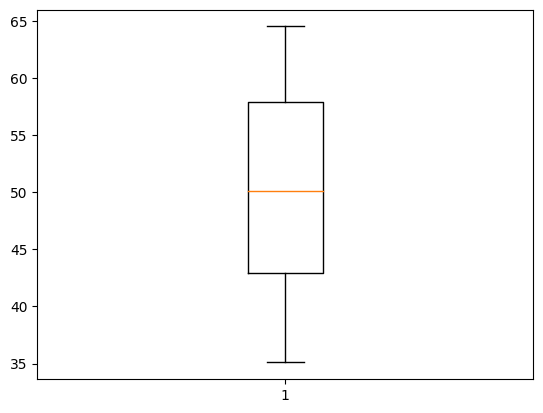

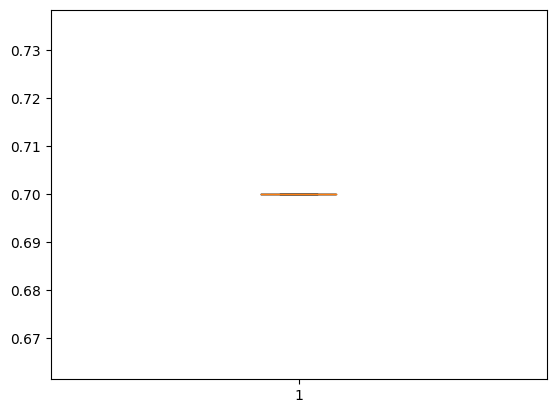

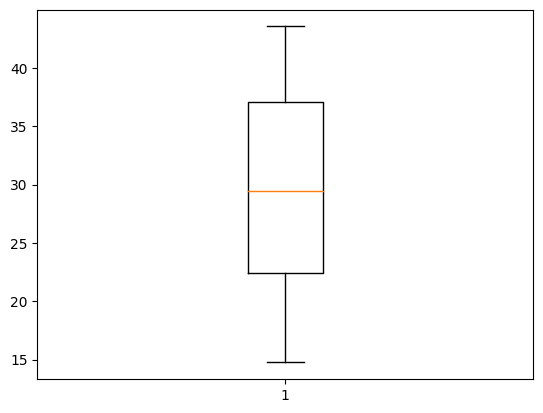

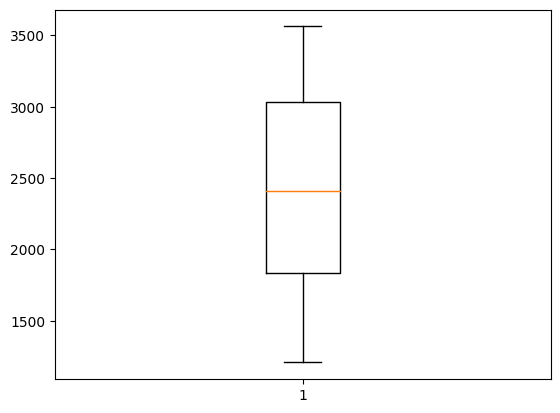

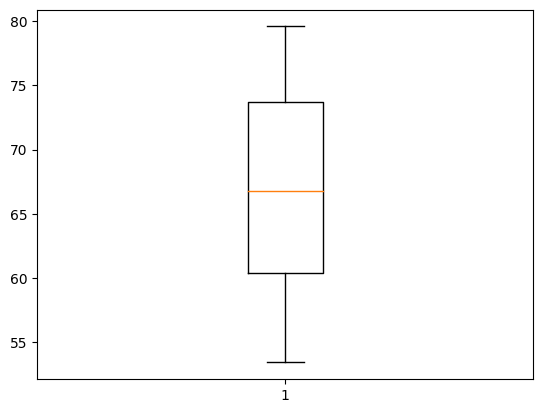

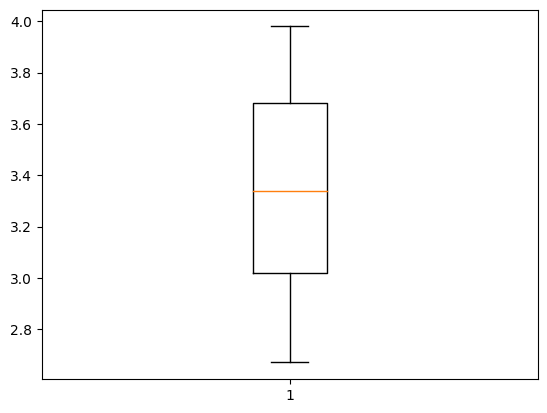

In [13]:
for i,col in enumerate(list(df_list[0])):
  # if i != 1 : continue
  # plt.figure(figsize=(20,10))
  # plt.plot(df_list[0][col][:200])
  # #plt.hist(df_list[0][col],bins=100)
  # plt.xlabel(col)
  # plt.show()
  plt.boxplot(df_list[0][col])
  # # 데이터의 중간값과 사분위 범위 계산
  # median = np.median(df_list[0][col], axis=0)
  # q1 = np.percentile(df_list[0][col], 25, axis=0)
  # q3 = np.percentile(df_list[0][col], 75, axis=0)
  # iqr = q3 - q1

  # # 이상치 경계값 계산
  # upper_bound = q3 + 1.5 * iqr
  # lower_bound = q1 - 1.5 * iqr
  # print(col,lower_bound,upper_bound)
  # plt.hist(df_list[0][col],bins=100)
  # plt.vlines(lower_bound,0,1, color='red', linestyle='solid', linewidth=3)
  # plt.vlines(upper_bound,0,1, color='red', linestyle='solid', linewidth=3)
  plt.show()

  # 경계값을 벗어나는 데이터 제거
  #clean_data = data[(data >= lower_bound) & (data <= upper_bound)]
    

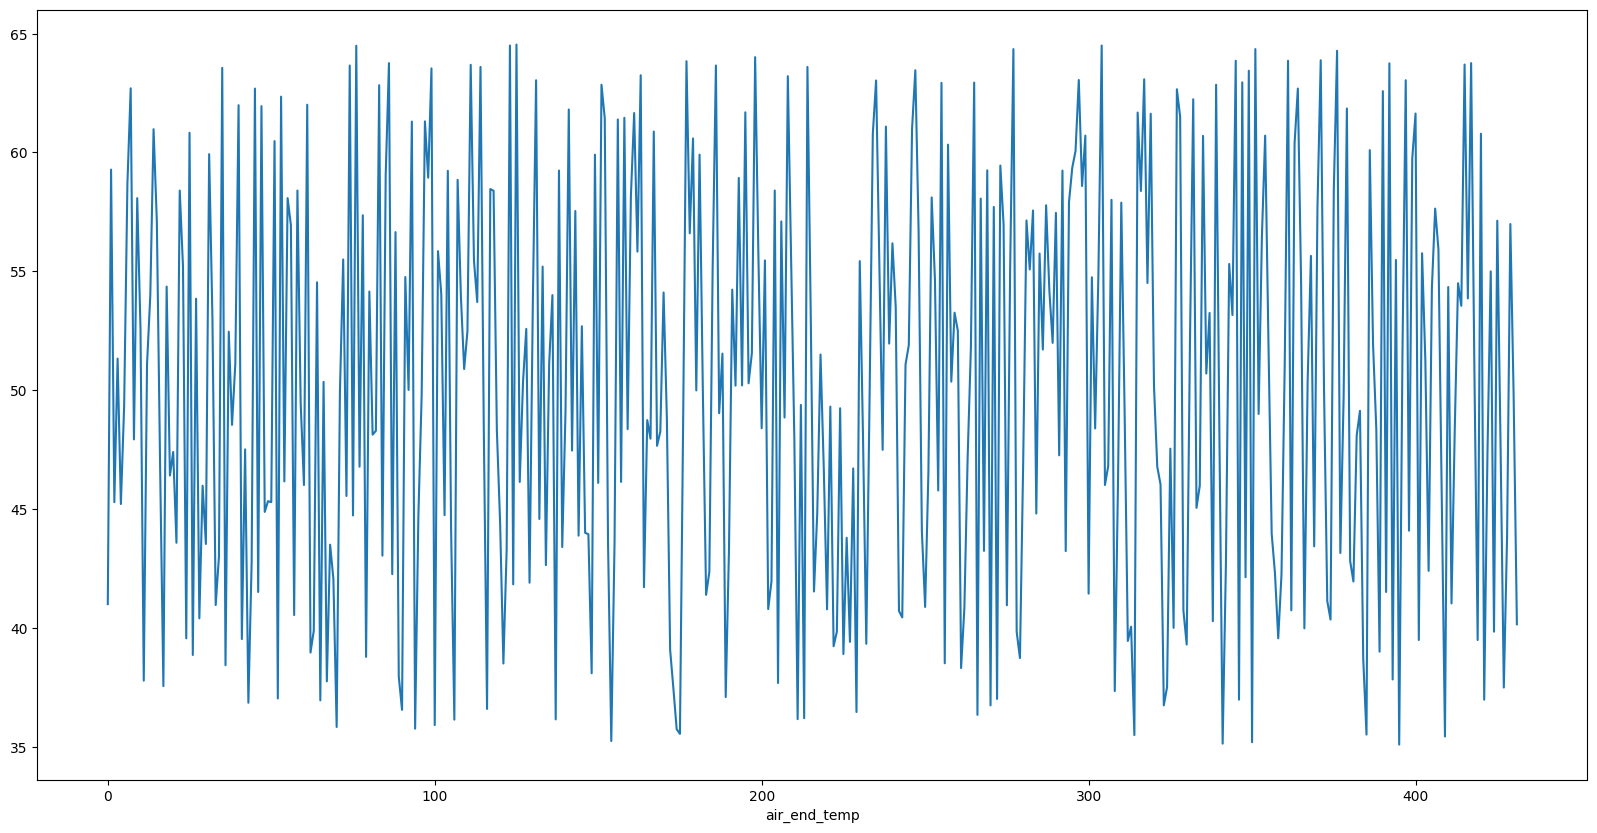

In [19]:
for i,col in enumerate(list(df_list[0])):
  if i != 1 : continue
  plt.figure(figsize=(20,10))
  plt.plot(df_list[0][col])
  #plt.hist(df_list[0][col],bins=100)
  plt.xlabel(col)
  plt.show()

  # # 데이터의 중간값과 사분위 범위 계산
  # median = np.median(df_list[0][col], axis=0)
  # q1 = np.percentile(df_list[0][col], 25, axis=0)
  # q3 = np.percentile(df_list[0][col], 75, axis=0)
  # iqr = q3 - q1

  # # 이상치 경계값 계산
  # upper_bound = q3 + 1.5 * iqr
  # lower_bound = q1 - 1.5 * iqr
  # print(col,lower_bound,upper_bound)
  # plt.hist(df_list[0][col],bins=100)
  # plt.vlines(lower_bound,0,1, color='red', linestyle='solid', linewidth=3)
  # plt.vlines(upper_bound,0,1, color='red', linestyle='solid', linewidth=3)
  # plt.show()
    

In [ ]:
np.min(df_list[0]['air_inflow'])

1.14

In [ ]:
np.min(df_test_list[0]['air_inflow'])

0.92

In [23]:
from statsmodels.tsa.seasonal import STL

# 시계열 데이터 불러오기
#df = pd.read_csv('data.csv', parse_dates=['time'], index_col='time')
# 시간 단위로 변환
df_hourly = df_list[0].resample('H').mean()
df_hourly
# STL 분석 수행
# stl = STL(df_hourly, seasonal=24)
# res = stl.fit()

# # 분해 결과 그래프 출력
# fig = res.plot()
# plt.show()

TypeError: ignored